In [28]:
import os
import s3fs
import gcsfs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import concurrent.futures
import logging
import warnings
import certifi
import ssl
import dask
import cfgrib
import cftime
import zarr
import holoviews as hv
import geoviews as gv
import colorcet
import pandas as pd
import panel as pn
from bokeh.models import NumeralTickFormatter
import geoviews.feature as gf
from PIL import Image
from shapely.geometry import box

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
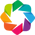

In [4]:
hv.extension('bokeh')
gv.extension('bokeh')
pn.extension()

In [5]:
# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("ecmwf_analysis.log"),
        logging.StreamHandler()
    ]
)


In [5]:
# Suppress warnings
warnings.filterwarnings("ignore")
# ----------------------------
# Configuration Parameters
# ----------------------------
bucket_name = 'ecmwf-forecasts'
date = '20241206'     # Format: YYYYMMDD
hour = '00z'          # Forecast initialization hour
resolution = '0p25'
run = 'oper'
base_s3_path = f's3://{bucket_name}/{date}/{hour}/ifs/{resolution}/{run}/'

# Initialize S3 filesystem with anonymous access
s3 = s3fs.S3FileSystem(anon=True)

logging.info("Listing GRIB2 forecast files from S3...")
all_files = s3.ls(base_s3_path)
# Filter to only .grib2 files
grib2_files = [f for f in all_files if f.endswith('.grib2')]

local_grib_dir = 'grib_files'
os.makedirs(local_grib_dir, exist_ok=True)

logging.info(f"Downloading GRIB2 files to {local_grib_dir}...")

def download_file(s3_file):
    filename = os.path.basename(s3_file)
    local_path = os.path.join(local_grib_dir, filename)
    try:
        s3.get(s3_file, local_path)
        #logging.info(f"Downloaded {filename}")
        return local_path
    except Exception as e:
        logging.error(f"Failed to download {s3_file}: {e}")
        return None

# Download files in parallel
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    downloaded_files = list(executor.map(download_file, grib2_files))

downloaded_files = [f for f in downloaded_files if f is not None]

logging.info(f"Successfully downloaded {len(downloaded_files)} GRIB2 files.")

2024-12-07 03:07:26,333 - INFO - Listing GRIB2 forecast files from S3...
2024-12-07 03:07:26,772 - INFO - Downloading GRIB2 files to grib_files...
2024-12-07 03:09:54,541 - INFO - Successfully downloaded 85 GRIB2 files.


In [6]:
grib_dir = 'grib_files'
grib_files = [os.path.join(grib_dir, f) for f in os.listdir(grib_dir) if f.endswith('.grib2')]
if not grib_files:
    logging.error("No GRIB2 files found in grib_files directory.")
    exit(1)

In [7]:
chunk_size = 10  # Process files in chunks of 10

# Initialize lists for storing intermediate results
ds_2t_list = []
ds_10u_list = []
ds_10v_list = []

# Process files in chunks
for i in range(0, len(grib_files), chunk_size):
    chunk_files = grib_files[i:i + chunk_size]  # Get the current chunk of files


    for f in chunk_files:
        ds = xr.open_dataset(
            f,
            engine='cfgrib',
            backend_kwargs={
                'indexpath': '',
                'filter_by_keys': {
                    'typeOfLevel': 'heightAboveGround',
                    'level': 2,
                    'shortName': '2t'
                }
            }
        )
        if 't2m' in ds:
            ds_2t_list.append(ds['t2m'].reset_coords(drop=True))
            
        # For 10u
        ds_u = xr.open_dataset(
            f,
            engine='cfgrib',
            backend_kwargs={
                'indexpath': '',
                'filter_by_keys': {
                    'typeOfLevel': 'heightAboveGround',
                    'level': 10,
                    'shortName': '10u'
                }
            }
        )
        if 'u10' in ds_u:
            ds_10u_list.append(ds_u['u10'].reset_coords(drop=True))
        
        
        # For 10v
        ds_v = xr.open_dataset(
            f,
            engine='cfgrib',
            backend_kwargs={
                'indexpath': '',
                'filter_by_keys': {
                    'typeOfLevel': 'heightAboveGround',
                    'level': 10,
                    'shortName': '10v'
                }
            }
        )
        if 'v10' in ds_v:
            ds_10v_list.append(ds_v['v10'].reset_coords(drop=True))


# Concatenate all chunks into final datasets
logging.info("Concatenating datasets...")
ds_2t = xr.concat(ds_2t_list, dim='time') if ds_2t_list else None
ds_10u = xr.concat(ds_10u_list, dim='time') if ds_10u_list else None
ds_10v = xr.concat(ds_10v_list, dim='time') if ds_10v_list else None

# Verify the results
print(ds_2t)
print(ds_10u)
print(ds_10v)

<xarray.DataArray 't2m' (time: 170, latitude: 721, longitude: 1440)> Size: 706MB
array([[[247.92343, 247.92343, 247.92343, ..., 247.92343, 247.92343,
         247.92343],
        [248.36093, 248.36093, 248.36093, ..., 248.39218, 248.36093,
         248.36093],
        [249.29843, 249.29843, 249.29843, ..., 249.29843, 249.29843,
         249.29843],
        ...,
        [246.29843, 246.29843, 246.29843, ..., 246.26718, 246.29843,
         246.29843],
        [246.76718, 246.73593, 246.73593, ..., 246.76718, 246.76718,
         246.76718],
        [245.45468, 245.45468, 245.45468, ..., 245.45468, 245.45468,
         245.45468]],

       [[253.16519, 253.16519, 253.16519, ..., 253.16519, 253.16519,
         253.16519],
        [252.85269, 252.85269, 252.85269, ..., 252.82144, 252.82144,
         252.82144],
        [252.75894, 252.75894, 252.75894, ..., 252.75894, 252.75894,
         252.75894],
...
        [246.15347, 246.15347, 246.15347, ..., 246.12222, 246.12222,
         246.12222],


In [8]:
if ds_2t is not None and ds_10u is not None and ds_10v is not None:
    ds_combined = xr.merge([ds_2t, ds_10u, ds_10v])
else:
    logging.error("Missing one or more datasets (2t, 10u, 10v).")
    exit(1)

ds_combined['time'] = xr.cftime_range(start="2024-12-06", periods=len(ds_combined['time']), freq="D")

In [9]:
# Define geographic and temporal subset parameters
lat_min, lat_max = 31, 71
lon_min, lon_max = -10, 40
start_date = "2024-12-06"
end_date = "2024-12-12"

# I chose europe for the example

In [10]:
# Align longitudes to [-180, 180] if necessary
logging.info("Aligning longitudes to [-180, 180]...")
if (ds_combined.longitude > 180).any():
    ds_combined = ds_combined.assign_coords(
        longitude=((ds_combined.longitude + 180) % 360) - 180
    ).sortby('longitude')
    logging.info("Longitudes aligned and sorted.")
else:
    logging.info("Longitudes already within [-180, 180].")

# Subset the dataset to europe region and specified time range
ds_europe_7d = ds_combined.sel(
    time=slice(start_date, end_date),
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)
logging.info("Subset dataset for europe and specified time range.")

# Load Climatology Data
logging.info("Loading climatology data...")
fs = gcsfs.GCSFileSystem(token='anon')
ds_climatology = xr.open_zarr(
    fs.get_mapper('gs://weatherbench2/datasets/era5-hourly-climatology/1990-2019_6h_1440x721.zarr/'),
    consolidated=True
)

# Align climatology longitudes
logging.info("Aligning climatology longitudes to [-180, 180]...")
if (ds_climatology.longitude > 180).any():
    ds_climatology = ds_climatology.assign_coords(
        longitude=((ds_climatology.longitude + 180) % 360) - 180
    ).sortby('longitude')
    logging.info("Climatology longitudes aligned and sorted.")
else:
    logging.info("Climatology longitudes already within [-180, 180].")

# Subset climatology data to europe region
ds_clim_europe = ds_climatology.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)
logging.info("Subset climatology data for europe region.")

In [11]:
# Match climatology to forecast time by day of year and hour
forecast_time = ds_europe_7d['time']
dayofyear_forecast = forecast_time.dt.dayofyear
hour_forecast = forecast_time.dt.hour

climatology_t2m = ds_clim_europe['2m_temperature']
matched_climatology = climatology_t2m.sel(
    dayofyear=dayofyear_forecast,
    hour=hour_forecast
)
logging.info("Climatology matched to forecast time.")

# Compute temperature anomalies
logging.info("Computing temperature anomalies...")
temp_anomalies = ds_europe_7d['t2m'] - matched_climatology

# Compute wind speed
logging.info("Computing wind speeds...")
wind_speed = np.sqrt(ds_europe_7d['u10']**2 + ds_europe_7d['v10']**2)

# Identify high wind speeds (>15 m/s)
logging.info("Identifying high wind speeds (>15 m/s)...")
high_wind = wind_speed > 15

# Identify significant temperature anomalies (> ±5 K)
logging.info("Identifying significant temperature anomalies (> ±5 K)...")
significant_anomalies = temp_anomalies.where(np.abs(temp_anomalies) > 5)


logging.info("Anomalies and exceedances computed.")


In [29]:
def degree_tick_formatter(plot, element):
    plot.handles['xaxis'].formatter = NumeralTickFormatter(format="0°")
    plot.handles['yaxis'].formatter = NumeralTickFormatter(format="0°")

time_values = temp_anomalies.time.values
num_times = len(time_values)

def plot_scene(time_index):
    # Extract slices
    temp_slice = temp_anomalies.isel(time=time_index)
    u_slice = ds_europe_7d['u10'].isel(time=time_index)
    v_slice = ds_europe_7d['v10'].isel(time=time_index)

    lat = temp_slice.latitude.values
    lon = temp_slice.longitude.values
    temp_data = temp_slice.values
    u_data = u_slice.values
    v_data = v_slice.values

    # Ensure latitude is ascending
    if lat[0] > lat[-1]:
        lat = lat[::-1]
        temp_data = temp_data[::-1, :]
        u_data = u_data[::-1, :]
        v_data = v_data[::-1, :]

    # Compute angle and magnitude for wind
    angle = np.arctan2(v_data, u_data)
    mag = np.sqrt(u_data**2 + v_data**2)

    # Filter wind vectors for plotting: Only include winds > 15 m/s
    high_wind_mask = mag > 15
    lon2d, lat2d = np.meshgrid(lon, lat)
    lon_filtered = lon2d[high_wind_mask]
    lat_filtered = lat2d[high_wind_mask]
    angle_filtered = angle[high_wind_mask]
    mag_filtered = mag[high_wind_mask]

    # Subsample wind vectors
    step = 2
    lon_filtered = lon_filtered[::step]
    lat_filtered = lat_filtered[::step]
    angle_filtered = angle_filtered[::step]
    mag_filtered = mag_filtered[::step]

    # Modify temperature data:
    # Set anomalies within ±5 K to NaN for transparency
    temp_data_mod = temp_data.copy()
    within_5_mask = np.abs(temp_data_mod) <= 5
    temp_data_mod[within_5_mask] = np.nan

    # Create temperature anomalies image:
    # Using a custom colormap that explicitly shows NaN as transparent
    temp_ds = hv.Dataset((lon, lat, temp_data_mod), kdims=['longitude', 'latitude'], vdims=['Temperature Anomalies'])
    temp_img = temp_ds.to(hv.Image, kdims=['longitude', 'latitude'], vdims='Temperature Anomalies')
    temp_img = temp_img.opts(
        cmap=['rgba(0,0,255,0.8)', "white", 'rgba(255,0,0,0.8)'],
        colorbar=True,
        clim=(-10, 10),
        tools=['hover'],
        width=800,
        height=600,
        title=f"Temp Anomalies at {pd.to_datetime(str(time_values[time_index])).strftime('%Y-%m-%d %H:%M')}",
        hooks=[degree_tick_formatter],
        projection=ccrs.PlateCarree()
    )

    # Wind vectors only for >15 m/s, in black
    vector_data_high = (lon_filtered, lat_filtered, angle_filtered, mag_filtered)
    wind_vectors_high = hv.VectorField(
        vector_data_high,
        kdims=['longitude', 'latitude'],
        vdims=['angle', 'mag']
    ).opts(
        color='black',
        alpha=0.7,
        tools=['hover'],
        scale=0.4,
        projection=ccrs.PlateCarree()
    )

    # Cartopy features
    land_feature = gv.Feature(cfeature.LAND.with_scale('50m')).opts(
        projection=ccrs.PlateCarree(),
        fill_color='lightgray'  
    )
    
    coastlines_feature = gv.Feature(cfeature.COASTLINE.with_scale('50m')).opts(
        projection=ccrs.PlateCarree(),
        line_color='black',     
        line_width=0.8         
    )
    
    borders_feature = gv.Feature(cfeature.BORDERS.with_scale('50m')).opts(
        projection=ccrs.PlateCarree(),
        line_color='black',  
        line_width=1           
    )

    outline_geom = box(lon.min(), lat.min(), lon.max(), lat.max()) 
    outline = gv.Path([outline_geom], crs=ccrs.PlateCarree()).opts(
        color='black', line_width=1, projection=ccrs.PlateCarree()
    )

    # Background tiles
    tiles = gv.tile_sources.OSM().opts(width=800, height=600, projection=ccrs.PlateCarree())

    # Combine all elements
    combined = tiles * land_feature * coastlines_feature * borders_feature * temp_img * wind_vectors_high * outline
    combined = combined.opts(hooks=[degree_tick_formatter])

    return combined

# Create and display each day's image
for i in range(num_times):
    scene = plot_scene(i)
    print(f"Image for day index {i}:")
    display(scene)


Image for day index 0:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 1:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 2:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 3:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 4:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 5:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]

Image for day index 6:


:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Feature.I     :Feature   [Longitude,Latitude]
   .Feature.II    :Feature   [Longitude,Latitude]
   .Feature.III   :Feature   [Longitude,Latitude]
   .Image.I       :Image   [longitude,latitude]   (Temperature Anomalies)
   .VectorField.I :VectorField   [longitude,latitude]   (angle,mag)
   .Path.I        :Path   [Longitude,Latitude]